# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

/Users/johnpeterson/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


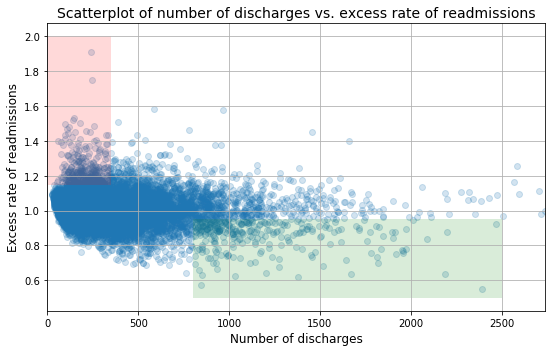

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


### A. Do you agree with the above analysis and recommendations? Why or why not?

No, I do not eniterly agree with the preliminary report and recommendations.

1. For the statistics section; a hypothesis test was not completed and the stats provided show a snapshot of the spectrum extremes while ignoring the middle of the spectrum.
2. There is a no statistical analysis peformed to back up the conclusions and recommendations.
3. Information is confusing when small capacity hospitals are considered <300 but the stats are implying small hospitals are <100.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

**1. Setup an appropriate hypothesis test.**

* Null Hypothesis: There is no siginificant difference of excess readmission rates between small hospitals (discharges <= 100) and large hospitals (discharges > 100).

* Alternate Hypothesis: There is a significant difference of excess readmission rates between small hospitals (discharges <= 100) and large hospitals (discharges > 100).

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
hr_df = hospital_read_df
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [8]:
# create df with specific columns and rename
df_hr = hr_df[['Number of Discharges', 'Excess Readmission Ratio']]
df_hr.columns = ['NOD', 'ERR']

# drop rows missing discharge info
df_hr = df_hr[df_hr['NOD'] != 'Not Available']

# change discharge values to numeric
df_hr['NOD'] = pd.to_numeric(df_hr.NOD)

# drop null values
df_hr.dropna(axis=0, how='any', subset=['ERR'], inplace=True)

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
NOD    11497 non-null int64
ERR    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [9]:
# Perform EDA

# seperate into groups based on hospital size(discharges)
small_hos = df_hr[df_hr['NOD'] <= 100]
large_hos = df_hr[df_hr['NOD'] > 100]

# Describe stats and calc mean of ERR
small_mean = np.mean(small_hos.ERR)
large_mean = np.mean(large_hos.ERR)

print('Small Hospital')
print(small_hos['ERR'].describe())

print('Large Hospital')
large_hos['ERR'].describe()

Small Hospital
count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: ERR, dtype: float64
Large Hospital


count    10274.000000
mean         1.005768
std          0.095046
min          0.549500
25%          0.947725
50%          1.000800
75%          1.059600
max          1.909500
Name: ERR, dtype: float64

In [10]:
# ECDF for small and large
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_small, y_small = ecdf(small_hos['ERR'])
x_large, y_large = ecdf(large_hos['ERR'])

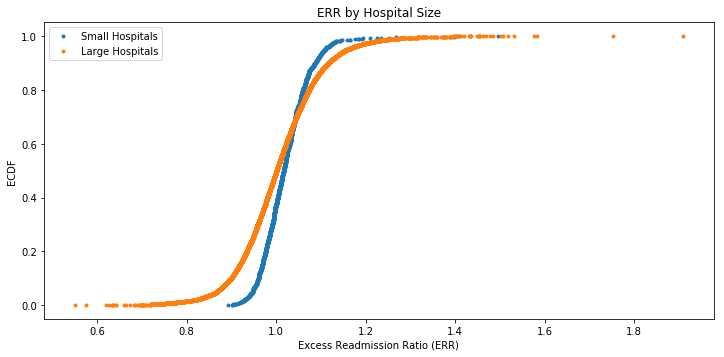

In [11]:
# plot ECDF

fig = plt.figure(figsize=(12,12))
_ = plt.subplot(2,1,1)
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.xlabel('Excess Readmission Ratio (ERR)')
_ = plt.ylabel('ECDF')
_ = plt.title('ERR by Hospital Size')
_ = plt.legend(('Small Hospitals', 'Large Hospitals'))
plt.show()

The chart above shows the ECDF for small and large hospitals. The small hospitals mean is centered on 1.022 and showing highers ERR's. The large hospitals mean in centered on 1.006 and shows a larger spread.

**2. Compute and report the observed significance value (or p-value).**

In [12]:
# difference between means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# compute the diff of means
emp_diff_means = diff_of_means(large_hos['ERR'], small_hos['ERR'])

# bootstrap test
# Concatenate forces: forces_concat
hosp_concat = np.concatenate((large_hos['ERR'], small_hos['ERR']))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(100000)

for i in range(100000):
    # Generate bootstrap sample
    bs_sample = np.random.permutation(hosp_concat)
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(large_hos)],
                                     bs_sample[len(large_hos):])
    
p = np.sum(abs(bs_replicates) >= abs(emp_diff_means)) / len(bs_replicates)
print(('p-value =', p), ('observed diff =', emp_diff_means))


('p-value =', 0.0) ('observed diff =', -0.01632073298728165)


The null hypothesis is rejected due to the p-value is 0 and there is a significant difference between large and small hospital ERR.

**3. Report statistical significance for  α= .01.**

The p-value calculated was 0 therefore it is significant for the α= .01.

**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

The data computed above shows there is a sgnificant difference in the ERR between small and large hospitals. The mean for small hospitals is larger than 1 indicating excess readmissions and the difference between the means in 1.6%. Based on the calculated data the recommendations provided are not wrong. Focus should be directed to improving the care at smaller hospitals.

**5. Look at the scatterplot above.**
* What are the advantages and disadvantages of using this plot to convey information?
 1. Advantage
    * Shows a downward trend with relation to discharges vs ERR
 2. Disadvantage
    * The shaded areas do not do a good enough job highlighting what was described. 

* Construct another plot that conveys the same information in a more direct manner.

In [13]:
# scatter plot of discharges vs excess readmission rate with trend line

# trend line
x = df_hr['NOD']
y = df_hr['ERR']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)

print('Slope:',slope) 
print('Intercerpt:', intercept)
print('r-value:',rvalue)
print('p-value:', pvalue)
print('Std Err:', stderr)

Slope: -2.9010517330570697e-05
Intercerpt: 1.018106147373357
r-value: -0.09739794351079352
p-value: 1.2225473776734486e-25
Std Err: 2.7649127349110583e-06


In [15]:
# calc trend
X = df_hr['NOD'].sort_values()
y_trend = slope*X + intercept

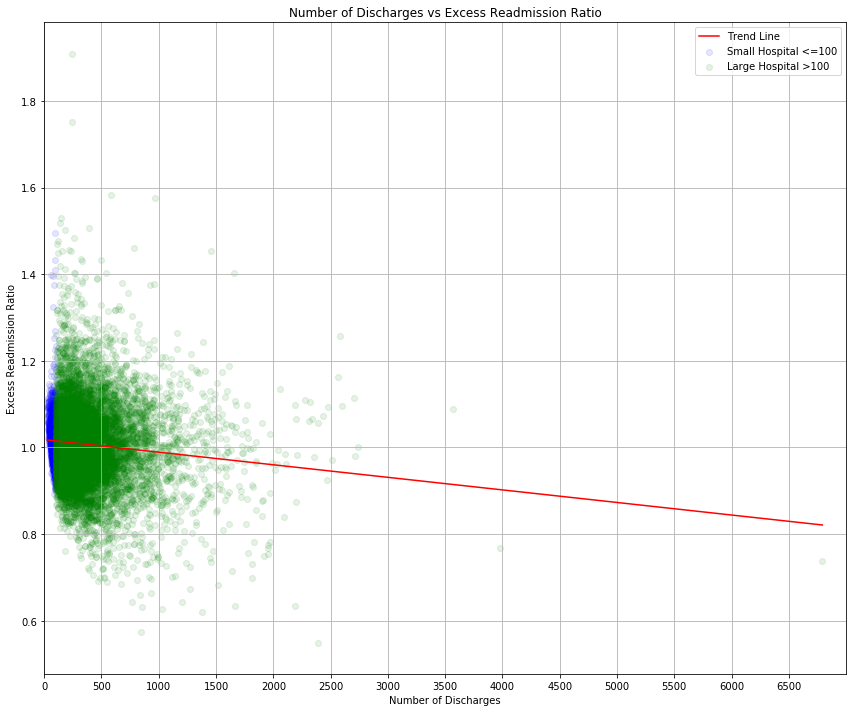

In [16]:
# plot
fig = plt.figure(figsize=(12,10))
plt.scatter(small_hos['NOD'], small_hos['ERR'], color='blue', label="Small Hospital <=100", alpha=.1)
plt.scatter(large_hos['NOD'], large_hos['ERR'], color='green', label="Large Hospital >100", alpha=.1)
plt.plot(X, y_trend, color='red', label="Trend Line")
plt.xlabel('Number of Discharges')
plt.xlim(0,7000)
plt.xticks(np.arange(0,7000, step=500))
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmission Ratio')
plt.legend()
plt.grid(True)
fig.tight_layout()
plt.show()